In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

img = Image.open("img.jpg")
image_array = np.array(img)

In [29]:
# img_arr

In [33]:
image_array.shape

(720, 1280, 3)

In [34]:
image_array

array([[[ 70, 123, 103],
        [ 70, 123, 103],
        [ 70, 123, 103],
        ...,
        [ 87, 101,  86],
        [ 88, 101,  84],
        [ 88, 101,  84]],

       [[ 70, 123, 103],
        [ 70, 123, 103],
        [ 70, 123, 103],
        ...,
        [ 87, 101,  86],
        [ 87, 101,  86],
        [ 87, 101,  84]],

       [[ 71, 122, 103],
        [ 71, 122, 103],
        [ 71, 122, 103],
        ...,
        [ 84, 101,  85],
        [ 84, 101,  85],
        [ 84, 101,  85]],

       ...,

       [[ 30,  61,  55],
        [ 30,  61,  55],
        [ 29,  60,  54],
        ...,
        [ 48,  60,  56],
        [ 49,  61,  57],
        [ 49,  61,  57]],

       [[ 29,  60,  54],
        [ 29,  60,  54],
        [ 29,  60,  54],
        ...,
        [ 49,  61,  57],
        [ 49,  61,  57],
        [ 50,  62,  58]],

       [[ 29,  60,  54],
        [ 29,  60,  54],
        [ 28,  59,  53],
        ...,
        [ 49,  61,  57],
        [ 50,  62,  58],
        [ 50,  62,  58]]

In [2]:
im_arr = np.moveaxis(image_array, source=2, destination=0)

In [3]:
C, H, W = im_arr.shape

In [4]:
C

3

In [5]:
im_arr

array([[[ 70,  70,  70, ...,  87,  88,  88],
        [ 70,  70,  70, ...,  87,  87,  87],
        [ 71,  71,  71, ...,  84,  84,  84],
        ...,
        [ 30,  30,  29, ...,  48,  49,  49],
        [ 29,  29,  29, ...,  49,  49,  50],
        [ 29,  29,  28, ...,  49,  50,  50]],

       [[123, 123, 123, ..., 101, 101, 101],
        [123, 123, 123, ..., 101, 101, 101],
        [122, 122, 122, ..., 101, 101, 101],
        ...,
        [ 61,  61,  60, ...,  60,  61,  61],
        [ 60,  60,  60, ...,  61,  61,  62],
        [ 60,  60,  59, ...,  61,  62,  62]],

       [[103, 103, 103, ...,  86,  84,  84],
        [103, 103, 103, ...,  86,  86,  84],
        [103, 103, 103, ...,  85,  85,  85],
        ...,
        [ 55,  55,  54, ...,  56,  57,  57],
        [ 54,  54,  54, ...,  57,  57,  58],
        [ 54,  54,  53, ...,  57,  58,  58]]],
      shape=(3, 720, 1280), dtype=uint8)

In [40]:
image_array[0, 0, :]

array([ 70, 123, 103], dtype=uint8)

In [41]:
im_arr[:, 0, 0]

array([ 70, 123, 103], dtype=uint8)

In [43]:
image_array[10, 10]

array([ 66, 125,  97], dtype=uint8)

In [6]:
im_arr[:, :4, :4].shape

(3, 4, 4)

In [5]:
kernel = np.random.uniform(0, 1, size=(3, 3, 3))

In [10]:
kernel.shape

(3, 3, 3)

In [6]:
kernel

array([[[0.99231953, 0.86907334, 0.00653064],
        [0.795522  , 0.04184462, 0.15757359],
        [0.99432102, 0.94901129, 0.46079363]],

       [[0.29274536, 0.62765364, 0.03263512],
        [0.1220371 , 0.25843836, 0.38809898],
        [0.9234832 , 0.68906586, 0.19236806]],

       [[0.04282213, 0.99942869, 0.20808346],
        [0.5020963 , 0.15814758, 0.3014388 ],
        [0.679774  , 0.36860231, 0.05191052]]])

In [7]:
np.sum(im_arr[:, :3, :3] * kernel)

np.float64(1144.2184354724213)

In [8]:
im_arr[:, :3, :3] * kernel

array([[[ 69.46236705,  60.8351335 ,   0.45714481],
        [ 55.68653997,   2.92912336,  11.03015128],
        [ 70.59679233,  67.37980149,  32.71634774]],

       [[ 36.00767923,  77.20139795,   4.01411947],
        [ 15.01056344,  31.7879182 ,  47.736175  ],
        [112.66495007,  84.06603549,  23.46890346]],

       [[  4.41067959, 102.94115533,  21.43259678],
        [ 51.71591905,  16.28920106,  31.04819655],
        [ 70.01672181,  37.96603834,   5.34678314]]])

In [11]:
kernels = np.random.uniform(0, 1, size=(32, 3, 3, 3))

In [14]:
kernels[0].shape

(3, 3, 3)

In [15]:
output_matrix = np.zeros((32, 7, 7), np.float32)

In [18]:
output_matrix[0]

array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

# Testing the fn

In [5]:
from cnn import Conv2D

convolution = Conv2D(3, 32, 3)
cal = convolution.apply_conv2d(im_arr)

In [6]:
cal

array([[[ -3.2176888 ,  -3.2176888 ,  -3.2176888 , ...,  -8.47445   ,
          -8.419679  ,  -8.479418  ],
        [ -3.258167  ,  -3.258167  ,  -3.258167  , ...,  -7.4803805 ,
          -7.312165  ,  -7.8114038 ],
        [ -3.0262845 ,  -3.0497205 ,  -3.486617  , ...,  -7.6211276 ,
          -7.895808  ,  -7.8810253 ],
        ...,
        [ -1.0363871 ,  -1.2279022 ,  -1.0740496 , ...,  -3.5542    ,
          -3.5344212 ,  -4.1813664 ],
        [ -0.90451676,  -1.0041236 ,  -0.7771072 , ...,  -4.1166134 ,
          -3.4893234 ,  -3.9232523 ],
        [ -0.92633075,  -1.31448   ,  -0.68659204, ...,  -4.666964  ,
          -4.562468  ,  -4.4711275 ]],

       [[ 14.620327  ,  14.620327  ,  14.620327  , ...,  16.660225  ,
          15.978378  ,  16.186323  ],
        [ 14.341965  ,  14.341965  ,  14.341965  , ...,  16.095171  ,
          16.05668   ,  15.80331   ],
        [ 14.299153  ,  14.446869  ,  14.255115  , ...,  14.894246  ,
          14.998472  ,  15.362015  ],
        ...,


In [7]:
cal.shape

(32, 718, 1278)

In [8]:
conv_img = np.moveaxis(cal, source=0, destination=2)

In [9]:
conv_img.shape

(718, 1278, 32)

In [10]:
conv_img[:,:, 0].shape

(718, 1278)

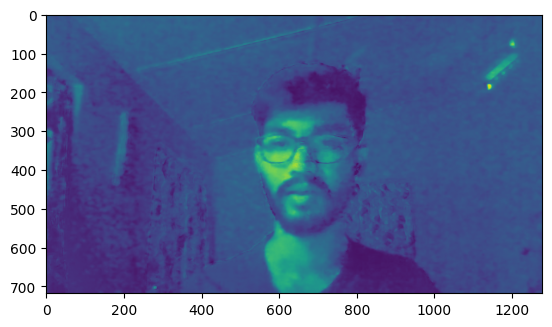

In [16]:
plt.imshow(conv_img[:, :, 2]);

In [ ]:
import torch.nn as nn
import torch
conv2d = nn.Conv2d(3, 32, 3)
im_tensor = torch.tensor(im_arr).float()
out_ts = conv2d(im_tensor)

In [ ]:
im_tensor = torch.tensor(im_arr).float()
out_ts = conv2d(im_tensor)

In [68]:
out_ts.shape

torch.Size([32, 718, 1278])

array([[1353.1333 , 1353.1333 , 1353.1333 , ..., 1242.0635 , 1247.9457 ,
        1248.5808 ],
       [1354.2852 , 1354.2852 , 1354.2852 , ..., 1237.1389 , 1242.9545 ,
        1239.0465 ],
       [1360.2712 , 1359.7941 , 1357.182  , ..., 1224.4935 , 1226.1454 ,
        1223.9093 ],
       ...,
       [ 670.54346,  664.4049 ,  651.5419 , ...,  750.7489 ,  757.3856 ,
         759.02185],
       [ 662.82806,  660.4249 ,  651.3894 , ...,  751.6387 ,  761.90173,
         766.4563 ],
       [ 656.70966,  653.8516 ,  645.4674 , ...,  752.7155 ,  763.1796 ,
         771.62384]], shape=(718, 1278), dtype=float32)

In [73]:
out_ts[0]

tensor([[0.0871, 0.0871, 0.0871,  ..., 0.6464, 0.9589, 0.1475],
        [0.1300, 0.1300, 0.1300,  ..., 1.2945, 1.5358, 0.9971],
        [0.9102, 0.8457, 0.7531,  ..., 1.3836, 0.6785, 1.0327],
        ...,
        [1.7943, 1.6237, 1.8737,  ..., 1.9039, 2.2955, 2.4550],
        [1.7087, 1.8329, 2.0231,  ..., 2.7811, 2.8441, 2.4181],
        [1.7150, 1.1848, 1.8356,  ..., 2.5634, 2.7939, 2.9555]],
       grad_fn=<SelectBackward0>)

In [70]:
out_ts[0].shape

torch.Size([718, 1278])

In [76]:
out = out_ts.detach().numpy()

In [61]:
out.shape

(32, 718, 1278)

In [62]:
out = np.moveaxis(out, source=0, destination=2)

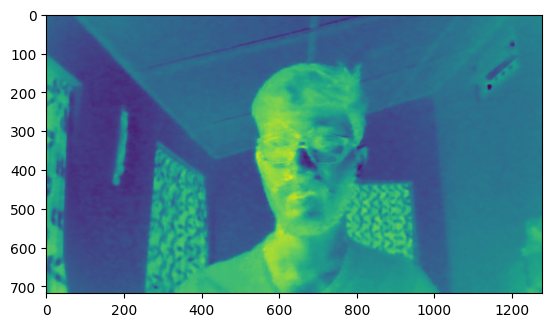

In [66]:
plt.imshow(out[:, :, 20]);

In [ ]:
kernel = np.random.uniform()

(3, 3, 3)

In [3]:
image_array.shape

(720, 1280, 3)

In [4]:
img = np.moveaxis(image_array, source=2, destination=0)

In [5]:
img.shape

(3, 720, 1280)

In [6]:
kernel = np.random.uniform(0, 1, size=(3, 3, 3))

In [7]:
slice_ = img[:, 0:3, 0:3]

In [12]:
slice_.shape

(3, 3, 3)

In [20]:
slice_ * kernel

array([[[20.34040924, 47.35485012, 10.51703414],
        [13.12636688, 42.22781325, 32.17589336],
        [24.002119  , 66.93974887,  6.48137771]],

       [[15.38580091, 25.58013086, 51.64183451],
        [15.89396917, 13.69817219, 94.79514425],
        [11.27701756, 71.36614722, 69.31463428]],

       [[84.28274223, 10.48918206, 46.26664882],
        [34.17816339, 11.78388497, 34.34482794],
        [12.92177715, 55.53103337, 89.20326185]]])

In [11]:
kernel_2d = np.random.uniform(0, 1, size=(3, 3))

In [13]:
output = np.zeros((3, 3, 3))

for i in range(3):
    current_c = slice_[i]
    output[i] = current_c * kernel_2d


In [18]:
output

array([[[ 63.26883185,  64.17003602,  58.80139049],
        [ 11.70119376,  45.69156804,  32.61711878],
        [ 19.00866856,  21.87295367,  52.9851217 ]],

       [[111.17237597, 112.75592044, 103.32244329],
        [ 20.56066903,  80.28661241,  57.31293729],
        [ 32.6627826 ,  37.58451193,  91.044857  ]],

       [[ 93.09556687,  94.42162443,  86.522046  ],
        [ 17.21747082,  67.23187869,  47.9937605 ],
        [ 27.5759558 ,  31.7311863 ,  76.86573993]]])

In [25]:
import torch.nn as nn
import torch
conv2d = nn.Conv2d(3, 32, 3)
im_tensor = torch.tensor(img, requires_grad=False).float()
out_ts = conv2d(im_tensor)

In [29]:
out_ts = out_ts.detach().numpy()

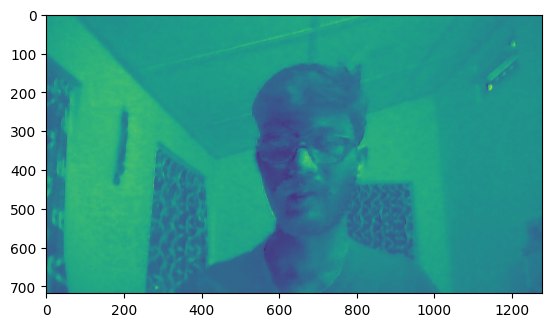

In [30]:
plt.imshow(out_ts[0, :, :]);

In [34]:
any((1, 2))

True

In [2]:
n = 1
assert n >= 2, "invalid"

AssertionError: invalid

In [1]:
import numpy as np
arr = np.arange(100).reshape(10, 10)

In [2]:
arr

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

In [4]:
arr[0:3*1:1, 2:(2 + 3)*1:1]

array([[ 2,  3,  4],
       [12, 13, 14],
       [22, 23, 24]])